<a href="https://colab.research.google.com/github/rafiddeshmukh/Linear_Regression-Car_Dekho/blob/main/Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels as sm
import statsmodels.formula.api as smf


from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing data from csv file
data_folder = '/content/drive/MyDrive/Colab Notebooks/Almabeter/Python.\
/dat/Self-Project-Data/'

df_cardekho = pd.read_csv(data_folder + 'CAR DETAILS FROM CAR DEKHO.csv')
df_cardetail = pd.read_csv(data_folder+'Car details v3.csv' )
df_cardata = pd.read_csv(data_folder + 'car data.csv')

**<p>Let's look out the dataset and try to find out which one is useful for our regression model..</p>**

In [ ]:
## first look
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df_cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_cardetail.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df_cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df_cardetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


As we can see first Two dataframe don't have any null value where as third dataframe have some null value.
<br>
<br>
### Let's describe all the dataset and see how it's look like....

---


In [ ]:
df_cardekho.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
df_cardata.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [ ]:
df_cardetail.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


#Deciding Dataset.. 

---

As our main motive is to find the selling price of that car which is on CarDekho.com.
<br> So, We need to more focus on car dekho dataset and analyze and visualize the thing...

---



In [ ]:
## checking shape
df_cardekho.shape

(4340, 8)

In [ ]:
df_cardata.shape

(301, 9)

In [ ]:
df_cardetail.shape

(8128, 13)

In [ ]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df_cardekho.isnull().sum().sort_values(ascending=False)[:5]

name             0
year             0
selling_price    0
km_driven        0
fuel             0
dtype: int64

In [ ]:
df_cardata.isnull().sum().sort_values(ascending=False)[:5]

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
dtype: int64

In [ ]:
df_cardetail.isnull().sum().sort_values(ascending=False)[:5]

torque       222
mileage      221
engine       221
seats        221
max_power    215
dtype: int64

In [ ]:
#check for duplicate
len(df_cardekho[df_cardekho.duplicated()])

763

As we can see we have some dublicate record in our dataset and we need to drop that record from our dataset.Because dublicate record doesn't give any further information about anything which will be usefull for our model as we have same recored in our dataset.

In [ ]:
#droping duplicat values
df_cardekho.drop_duplicates(keep='first',inplace=True)

In [ ]:
## checking shape
df_cardekho.shape

(3577, 8)

In [ ]:
#check for duplicate
len(df_cardetail[df_cardetail.duplicated()])

1202

In [ ]:
len(df_cardata[df_cardata.duplicated()])

2

In [ ]:
df_cardekho.reset_index(inplace=True)

In [ ]:
del df_cardekho['index']

In [ ]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.7+ KB


In [ ]:
df_cardekho.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


As We have a beautiful analysis for our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!
<br>So, Let start with EDA for mumerical data.

## Exploratory Data Analysis

---

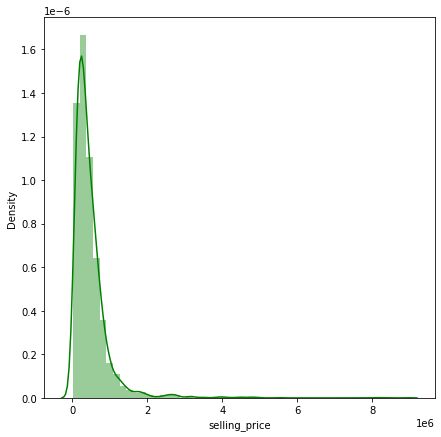

In [ ]:
# Dependent variable "Selling_price"
plt.figure(figsize=(7,7))
sns.distplot(df_cardekho['selling_price'],color='green')

From se above graph we can see as our price in  10^6 so it our graph is movig towards to y axis and we couldn't get any better visualziation with these type of graph.
<br>So,It better to take log of the dependent variable to draw the graph.

**Let's take a log of selling price and draw the plot it will give us more clarification about data and we can visualize in a better way...**

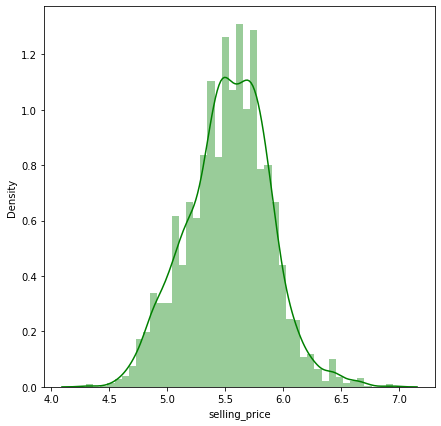

In [ ]:
# Dependent variable "Selling_price"
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df_cardekho['selling_price']),color='green')

If we see the above graph it's look like a normal distribution than above one..

In [ ]:
## exploring nemerical features
num_features =  df_cardekho.describe().columns
num_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

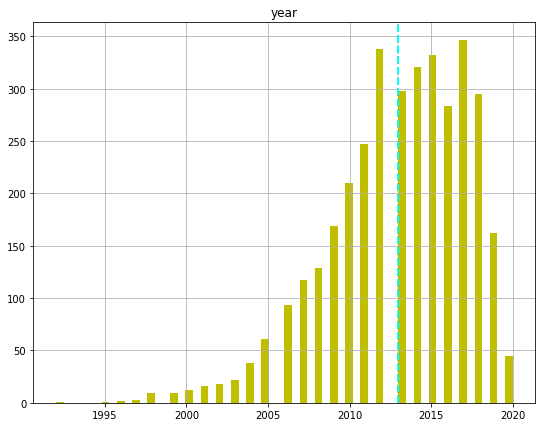

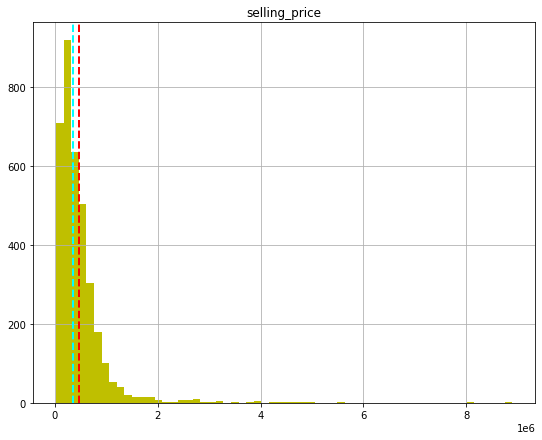

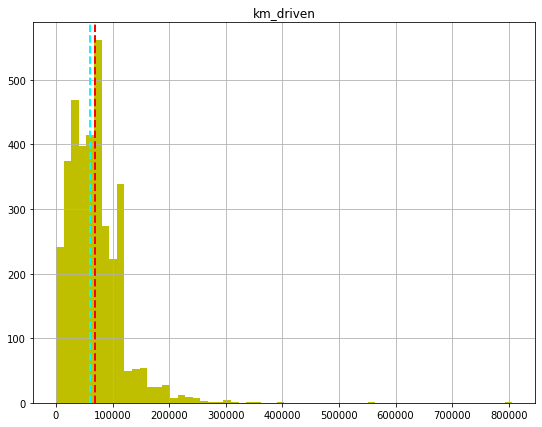

In [ ]:
#@title default data test
## plot bar plot for each numerical features count

for col in num_features:
  fig = plt.figure(figsize=(9,7))
  ax = fig.gca()
  feature  = df_cardekho[col]
  feature.hist(bins = 60,ax = ax, color='y')
  ax.axvline(feature.mean(), color= 'red',linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth=2)

  ax.set_title(col)
plt.show


From above it's clear that our numeric data is right as well as left skewed for some columns..
<br> Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

<function matplotlib.pyplot.show(*args, **kw)>

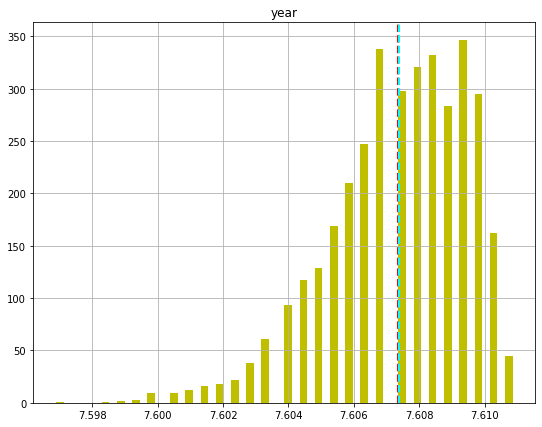

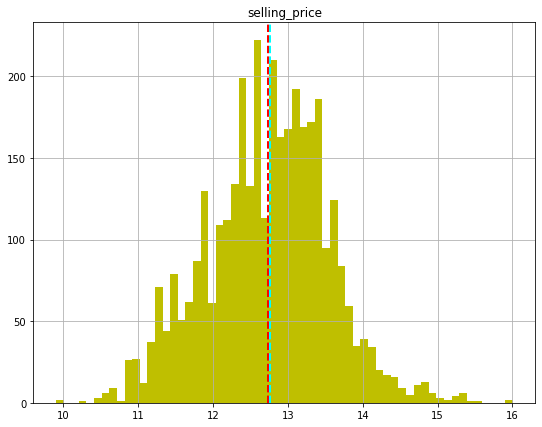

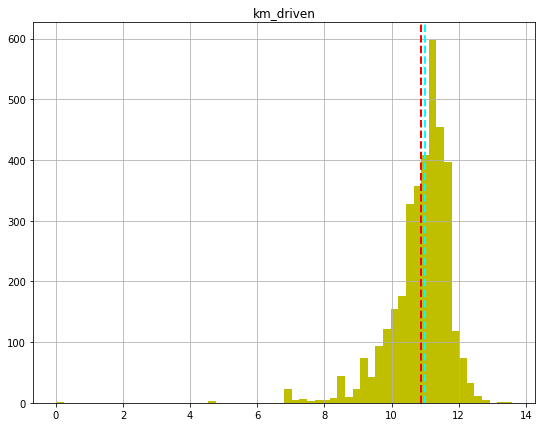

In [ ]:
## log transformation

for col in num_features:
  fig = plt.figure(figsize=(9,7))
  ax = fig.gca()
  feature  = np.log(df_cardekho[col])
  feature.hist(bins = 60,ax = ax,color='y')
  ax.axvline(feature.mean(), color= 'red',linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth=2)

  ax.set_title(col)
plt.show


Now, we can visualize what the relationship between them...
<br>**Let's try to plot some scatter** plot between independent with the dependent variable and figure out how they behaves or what they have relationship....

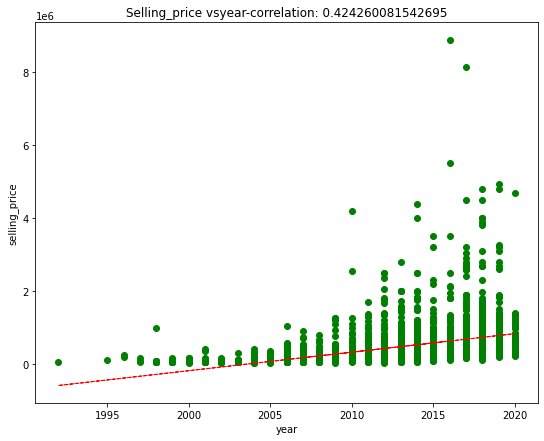

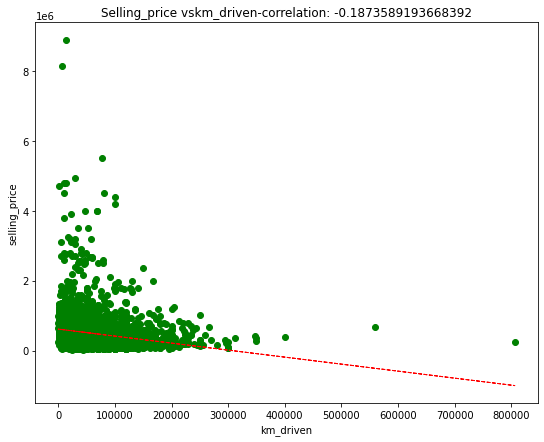

In [ ]:
from scipy.spatial.distance import correlation
## realtion between selling price and other features

for col in num_features:
  
  label = df_cardekho['selling_price']
  if col=='selling_price':
    continue
  else:
    fig = plt.figure(figsize=(9,7))
    ax = fig.gca()
    feature = df_cardekho[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='green')
    plt.xlabel(col)
    plt.ylabel("selling_price")
    ax.set_title("Selling_price vs"+col+"-correlation: "+ str(correlation) )
    z =np.polyfit(df_cardekho[col], df_cardekho['selling_price'], 1)
    y_hat = np.poly1d(z)(df_cardekho[col])

    plt.plot(df_cardekho[col], y_hat, "r--", lw=1)

plt.show()


From above we can see most of the car have driven less the 200000 km and we take that one as boundry condition and make them as an outlier.
<br> And for the Year column we can keep the data for last 15 year from which we can make a good model.

### **Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.**

---
Let's keep the data only for last 15 year that is between 2005 to 2020. and KM_driven is less then 200000.

In [ ]:
df_cardekho = df_cardekho[df_cardekho['year'] >=2005]

df_cardekho = df_cardekho[df_cardekho['km_driven'] <=200000]

In [ ]:
df_cardekho.reset_index(inplace=True)
del df_cardekho['index']

In [ ]:
df_cardekho.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


Let's Draw one more time scatter plot between dependent and all the indendent variable...

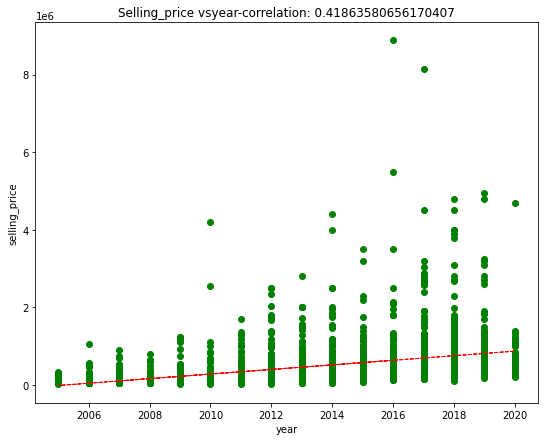

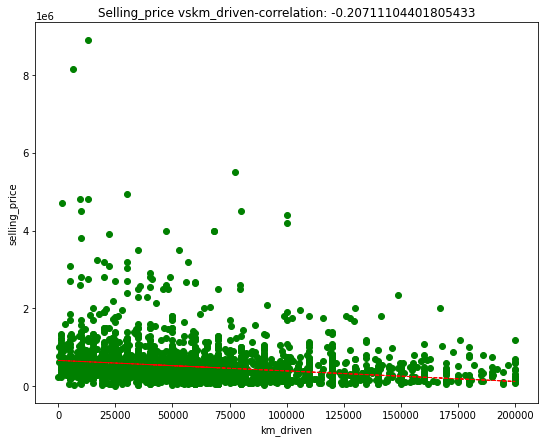

In [ ]:
## realtion between selling price and other features

for col in num_features:
  
  label = df_cardekho['selling_price']
  if col=='selling_price':
    continue
  else:
    fig = plt.figure(figsize=(9,7))
    ax = fig.gca()
    feature = df_cardekho[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='green')
    plt.xlabel(col)
    plt.ylabel("selling_price")
    ax.set_title("Selling_price vs"+col+"-correlation: "+ str(correlation) )
    z =np.polyfit(df_cardekho[col], df_cardekho['selling_price'], 1)
    y_hat = np.poly1d(z)(df_cardekho[col])

    plt.plot(df_cardekho[col], y_hat, "r--", lw=1)

plt.show()


After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them..
<br>Here we cay say that..
* If the KM_driven is less then price will be high for the car.
* If the car is too old then it will be relativily cheap then latest one.

Let's try to  find and remove the multicollinearity from our dataset and also find some correlation between numerical data.
<br> we can also use some feature engineering to create someother variable with existing one to get more understanding the data.

In [ ]:
df_cardekho['age']= 2023 - df_cardekho['year']

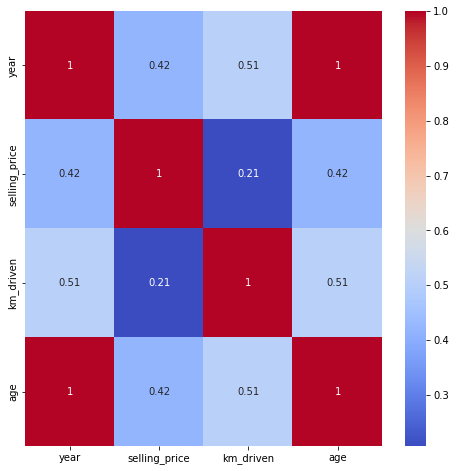

In [ ]:
## correlation
plt.figure(figsize=(8,8))
sns.heatmap(abs(df_cardekho.corr()), annot=True, cmap="coolwarm")

From above It's clear that car price Car Age and Year is have strong relation or they can provide same info so we can remove year column from our dataset.
<br> KM_driven has an average relation so we can keep that variable for our model.

In [ ]:
## Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

  #calculating vif
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values,i) 
  for i in range(x.shape[1])]

  return vif

In [ ]:
calc_vif(df_cardekho[[i for i in df_cardekho.describe().columns 
                      if i not in ['year', 'selling_price']]])

,variables,VIF
0,km_driven,4.958801
1,age,4.958801


We are getting  VIF is 4.065 that is good to perform our linear regression.

In [ ]:
numerical_features = ['km_driven','age']

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [ ]:
df_cardekho['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
df_cardekho['company'] = df_cardekho['name'].str.split(" ", expand=True)[0]


df_cardekho['company'] = df_cardekho['company'].str.title()
df_cardekho['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda


# Analysis of Categorical Data

---
In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.


In [ ]:
cat_features = df_cardekho.describe(include=['object', 'category']).columns
cat_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

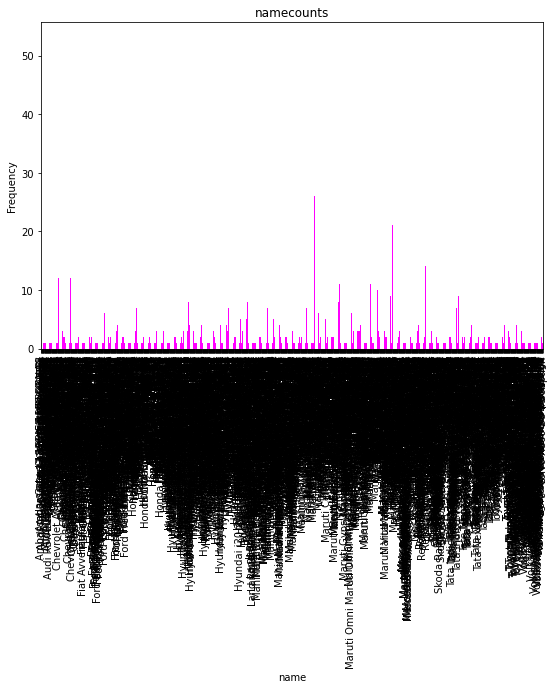

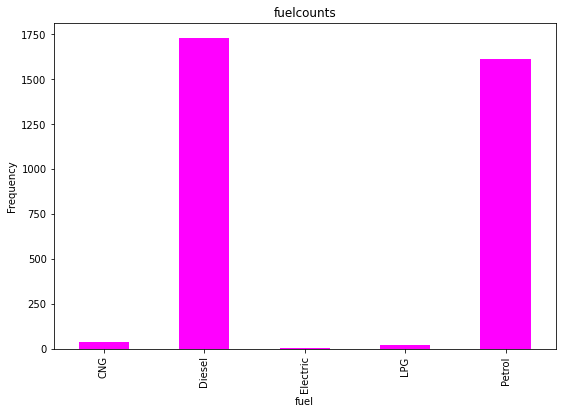

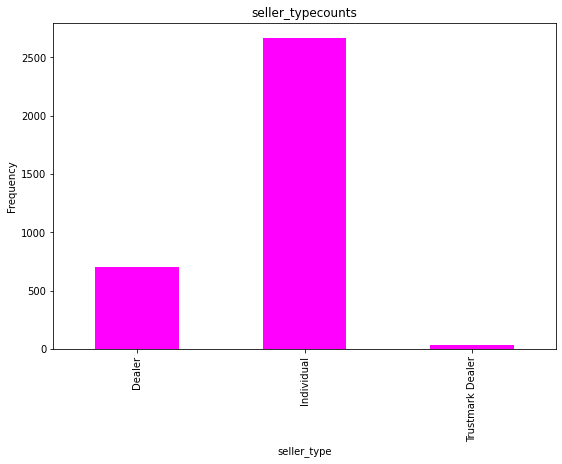

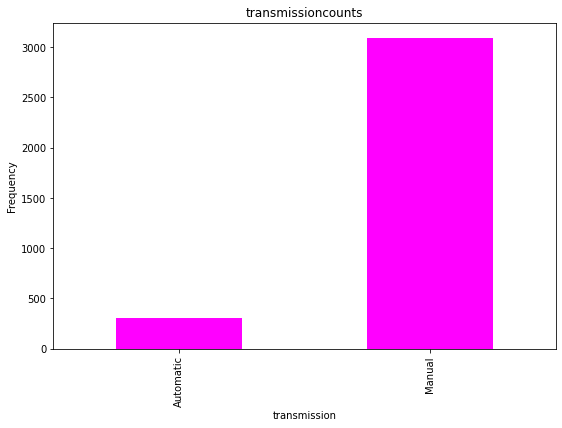

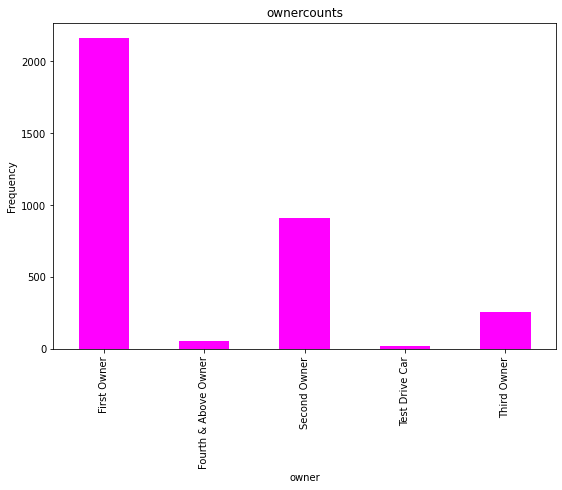

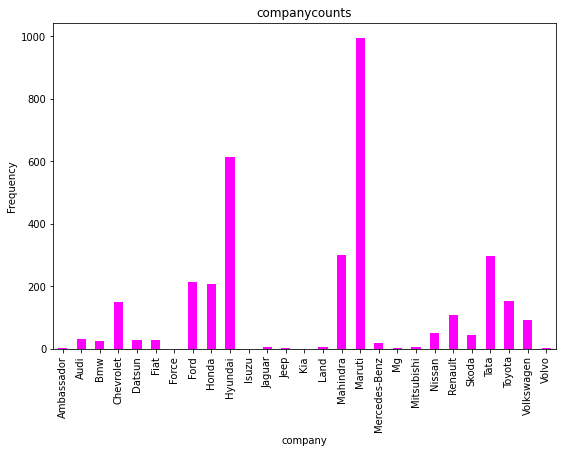

In [ ]:
# plot bar plot for each category features

for col in cat_features:
  counts = df_cardekho[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  counts.plot.bar(ax=ax , color='magenta')
  ax.set_title(col + 'counts')
  ax.set_xlabel(col)
  ax.set_ylabel("Frequency")

plt.show()


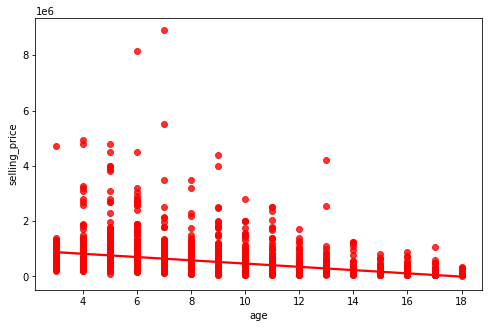

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x="age",y='selling_price',data=df_cardekho,color='red')

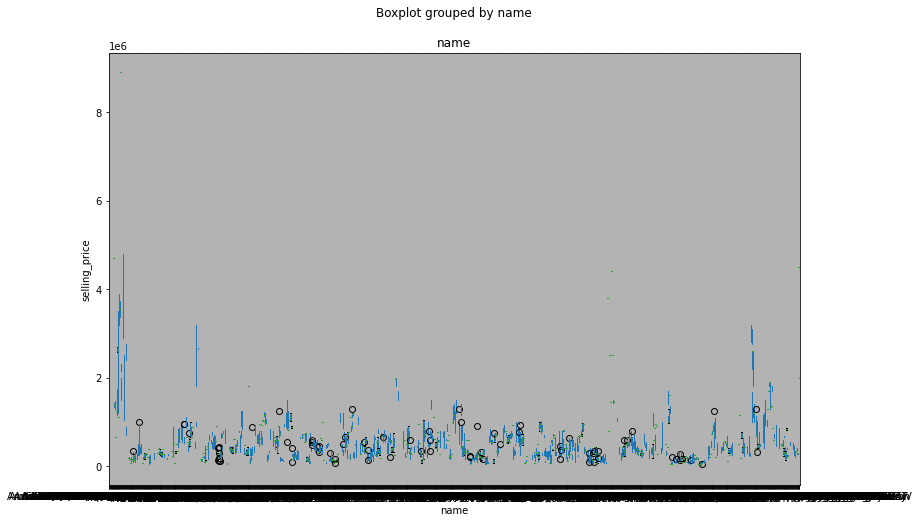

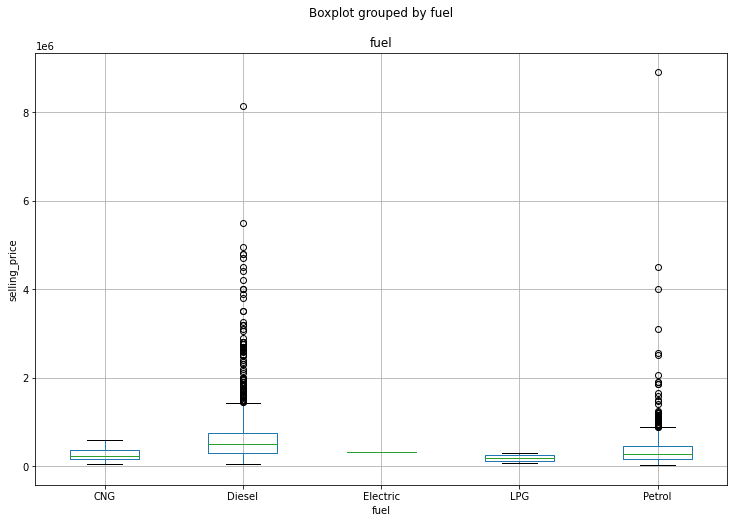

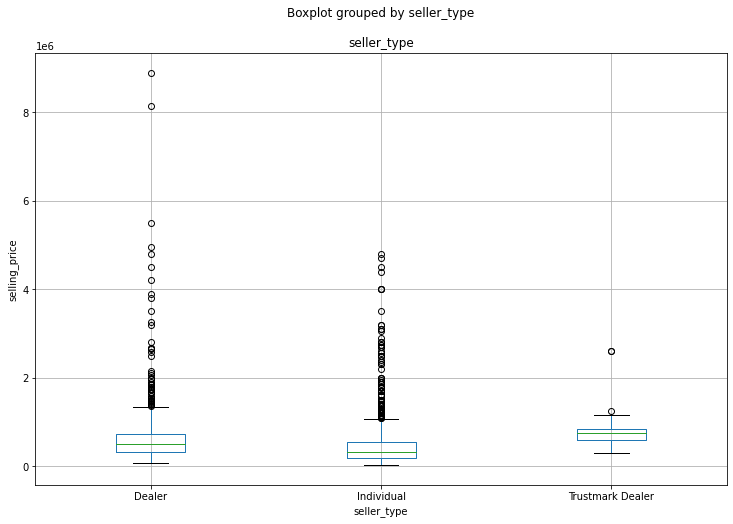

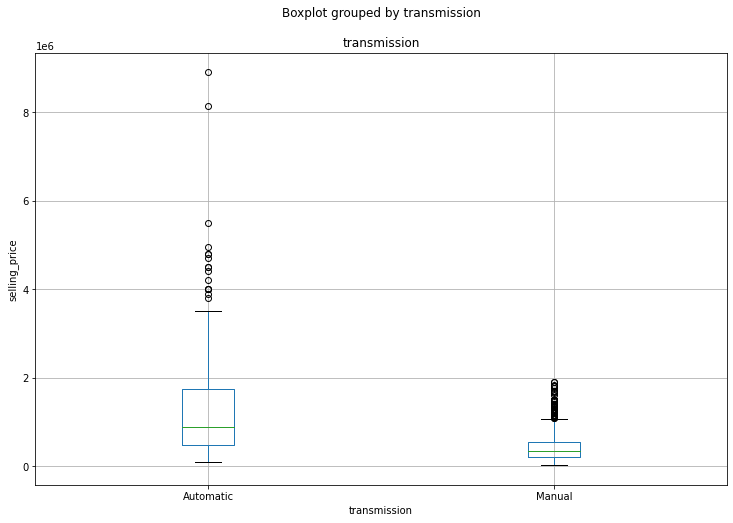

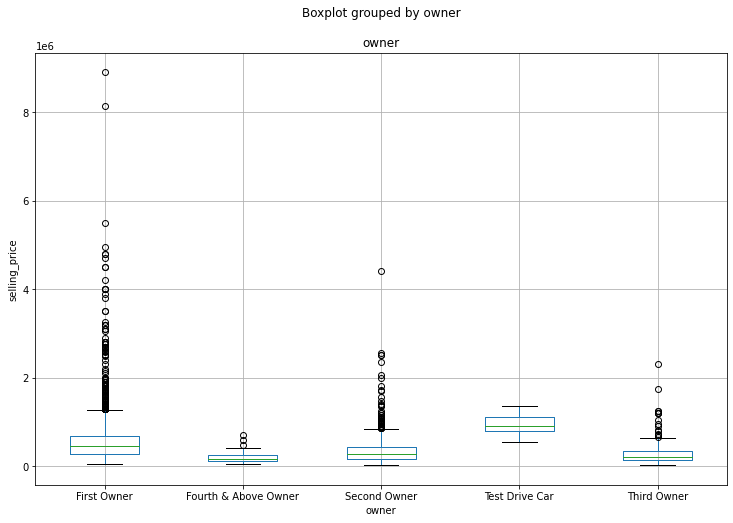

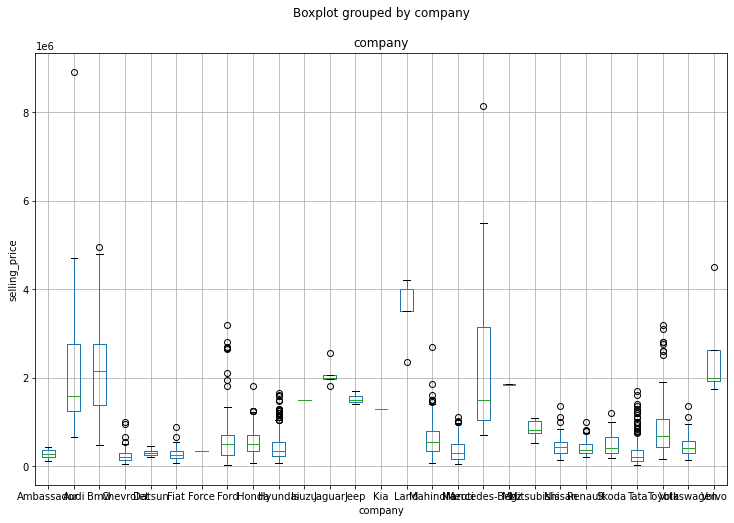

In [ ]:
#plot boxplot for each categorical features

for col in cat_features:
  fig = plt.figure(figsize=(12,8))
  ax = fig.gca()
  df_cardekho.boxplot(column='selling_price',by=col, ax = ax)
  ax.set_title(col)
  ax.set_ylabel("selling_price")

plt.show()

<Figure size 1440x720 with 0 Axes>

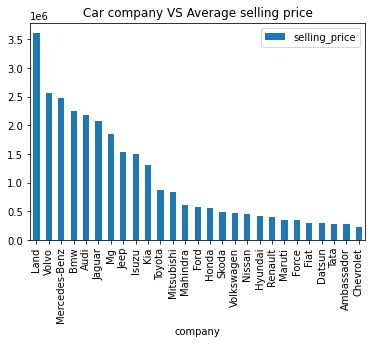

In [ ]:
plt.figure(figsize=(20,10))

df_carcomp = pd.DataFrame(df_cardekho.groupby(['company'])\
                          ['selling_price'].mean().\
                          sort_values(ascending =False))

df_carcomp.plot.bar()
plt.title("Car company VS Average selling price")
plt.show()

In [ ]:
df_carcomp.rename(columns={'selling_price':'average_selling_price'}, 
                  inplace=True)

In [ ]:
df_cardekho = df_cardekho.merge(df_carcomp, on ='company', how='left')

In [ ]:
df_cardekho['car_category'] = df_cardekho['average_selling_price']\
.apply(lambda x:0 if x<400000 else(1 if 400000 <= x < 700000 else 2))

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,company,average_selling_price,car_category
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti,350566.930514,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti,350566.930514,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai,423908.747557,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda,557067.584541,1


# Data Preparation

---



In [ ]:
df_cardekho.shape

(3395, 12)

In [ ]:
df_cardekho['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df_cdekho_cpy = df_cardekho.copy()

In [ ]:
df_cdekho_cpy.shape

(3395, 12)

## **Feature Engineering**

---
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.


We shall convert categorical features to numeric type...

In [ ]:
## Data encoding
#label encoding

encoder = {"owner":{"Test Drive Car": 4, "First Owner": 0, "Second Owner": 1, 
                    "Third Owner": 2, "Fourth & Above Owner": 3}
           }
df_cdekho_cpy = df_cdekho_cpy.replace(encoder)


In [ ]:
#one hot encoding

df_cdekho_cpy = pd.get_dummies(df_cdekho_cpy, columns=['fuel'], 
                               prefix=['Fuel_Type'])

In [ ]:
df_cdekho_cpy = pd.get_dummies(df_cdekho_cpy, columns=['seller_type', 
                                                       'transmission'], 
                               prefix=['Seller_Type','Transmission'])

In [ ]:
df_cdekho_cpy.head(2)

,name,year,selling_price,km_driven,owner,age,company,average_selling_price,car_category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,16,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,16,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1


With the help of one  hot coding

*   Fuel type attribute  is divided into 5 new attributes.
*   Transmission attribute is divided into 2 new attributes.
*   Seller_Type attribute is is divided into 2 new attributes.

In [ ]:
df_cdekho_cpy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'age', 'company',
       'average_selling_price', 'car_category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
features = numerical_features.copy()

In [ ]:
features

['km_driven', 'age']

In [ ]:
features.extend(['owner','car_category','average_selling_price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [ ]:
features

['km_driven',
 'age',
 'owner',
 'car_category',
 'average_selling_price',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Seller_Type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [ ]:
df_cdekho_cpy[features]

,km_driven,age,owner,car_category,average_selling_price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,70000,16,0,0,350566.930514,0,0,0,0,1,0,1,0,0,1
1,50000,16,0,0,350566.930514,0,0,0,0,1,0,1,0,0,1
2,100000,11,0,1,423908.747557,0,1,0,0,0,0,1,0,0,1
3,46000,6,0,0,296551.655172,0,0,0,0,1,0,1,0,0,1
4,141000,9,1,1,557067.584541,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,80000,9,1,1,423908.747557,0,1,0,0,0,0,1,0,0,1
3391,80000,9,1,1,423908.747557,0,1,0,0,0,0,1,0,0,1
3392,83000,14,1,0,350566.930514,0,0,0,0,1,0,1,0,0,1
3393,90000,7,0,1,423908.747557,0,1,0,0,0,0,1,0,0,1


In [ ]:
df_cdekho_cpy[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3394
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     3395 non-null   int64  
 1   owner                         3395 non-null   int64  
 2   age                           3395 non-null   int64  
 3   average_selling_price         3395 non-null   float64
 4   car_category                  3395 non-null   int64  
 5   Fuel_Type_CNG                 3395 non-null   uint8  
 6   Fuel_Type_Diesel              3395 non-null   uint8  
 7   Fuel_Type_Electric            3395 non-null   uint8  
 8   Fuel_Type_LPG                 3395 non-null   uint8  
 9   Fuel_Type_Petrol              3395 non-null   uint8  
 10  Seller_Type_Dealer            3395 non-null   uint8  
 11  Seller_Type_Individual        3395 non-null   uint8  
 12  Seller_Type_Trustmark Dealer  3395 non-null   uint8  
 13  Tra

In [ ]:
## scaling the features for liner model

X = df_cdekho_cpy[features].apply(zscore)

In [ ]:
X.shape

(3395, 15)

In [ ]:
y=np.log10(df_cdekho_cpy['selling_price'])

In [ ]:
y.shape

(3395,)

# **Implementing Linear Regression**

---
Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.


In [ ]:
# Train test split
X_train, X_test, y_train, y_test=  train_test_split(X,y, test_size=0.2, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [ ]:
# fitting linear regression model on data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#checking scor of model
reg.score(X_train, y_train)

0.7460054511255816

In [ ]:
reg.coef_

array([-1.74923197e-02, -1.87982749e-01, -1.43158144e-02,  5.92765457e-02,
        8.14184583e-02,  2.02503772e+11,  9.75070686e+11,  2.43929682e+10,
        1.52923453e+11,  9.73891685e+11, -9.91315193e+10, -1.00818300e+11,
       -2.40402612e+10, -8.09440232e+10, -8.09440232e+10])

In [ ]:
reg.intercept_

-155796913.45247215

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
len(y_pred)

679

In [ ]:
len(y_test)

679

## **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) **bold text** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [ ]:
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE: ",MSE)

MAE = mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE: ",MAE)

RMSE = np.sqrt(MSE)
print("RMSE: ", RMSE)


MSE:  62036179046.59366
MAE:  146270.80755726938
RMSE:  249070.63063836662


In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :", r2)
print("Adjusted R2: ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7580137264526585
Adjusted R2:  0.7525389238837141


Text(0, 0.5, 'Predicted selling price')

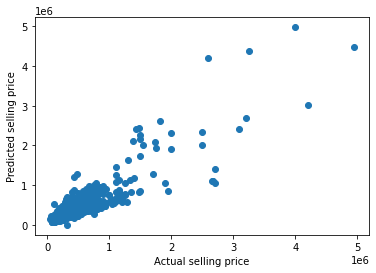

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

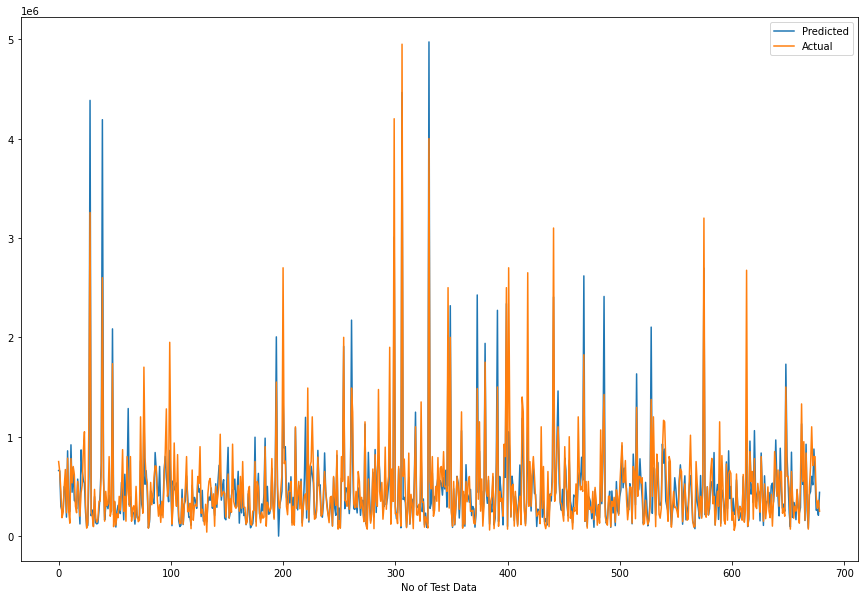

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

If We see above graph our prediction is quiet good.!:)

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

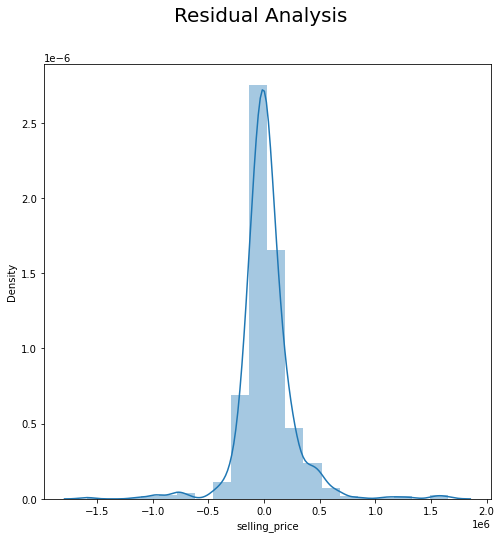

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Lets' try to find Hetroscadacity..

Text(0, 0.5, 'residuals')

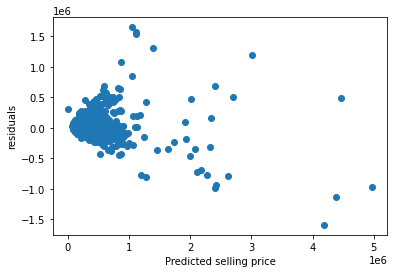

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred),10**(y_test)-10**(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [ ]:
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59947897893.12127
MAE : 144033.9490854695
RMSE : 244842.5981995806
R2 : 0.7661595436550428
Adjusted R2 :  0.7608690355929397


Text(0, 0.5, 'Predicted selling price')

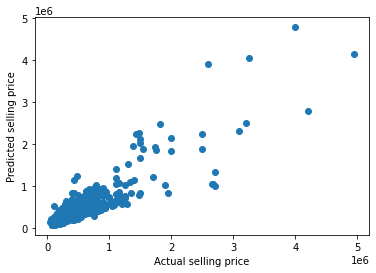

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

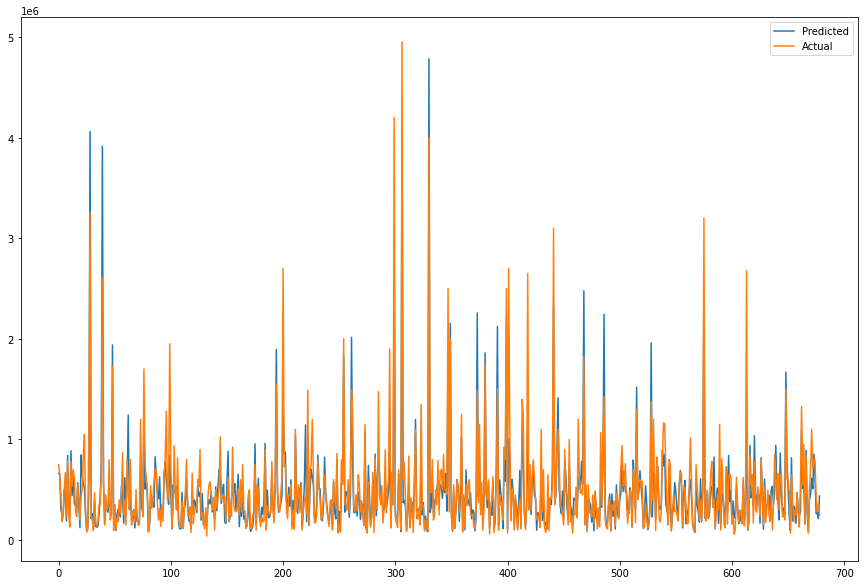

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

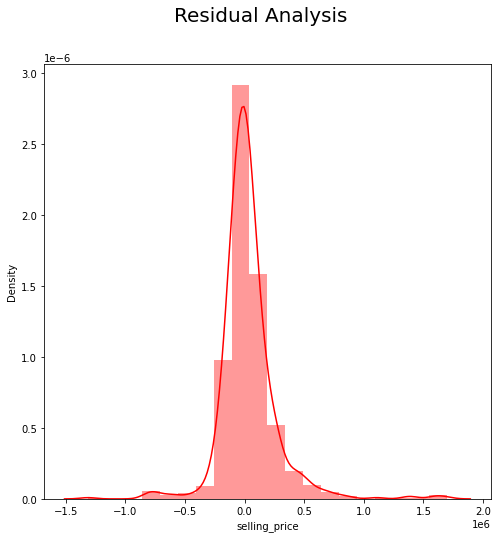

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

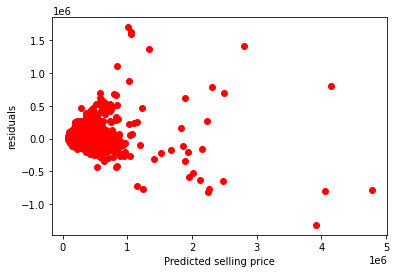

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_l),10**(y_test)-10**(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Implementing Cross-Validation Procedure for Lasso**

---


In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.029346408730421356


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61365877719.64536
MAE : 145556.6583598306
RMSE : 247721.37114033048
R2 : 0.7606283897468022
Adjusted R2 :  0.755212742456006


Text(0, 0.5, 'Predicted selling price')

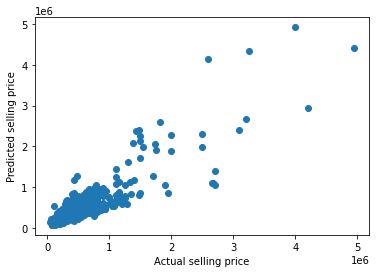

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

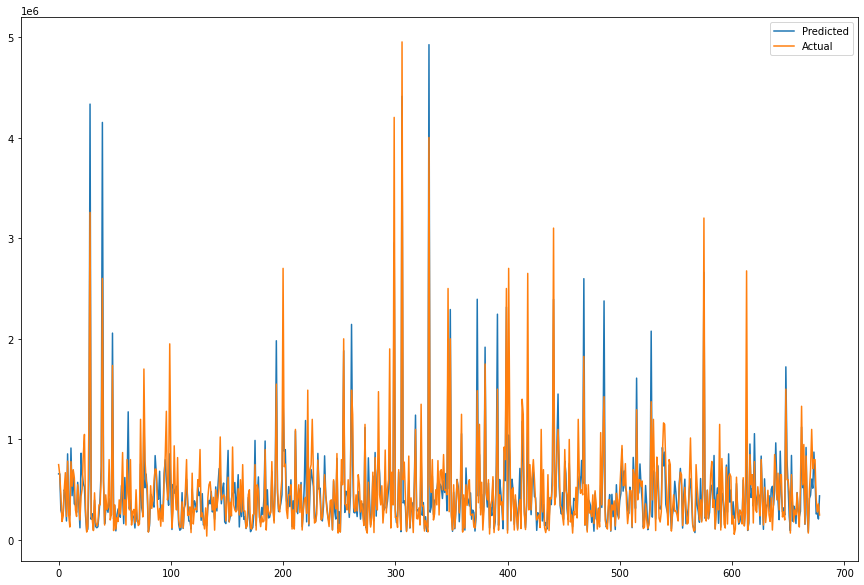

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

If we see above graph our prediction is very good, for the give set of value.

Text(0.5, 0.98, 'Residual Analysis')

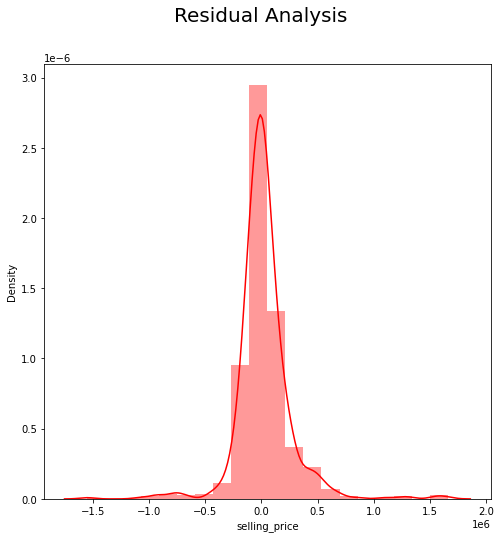

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Text(0, 0.5, 'residuals')

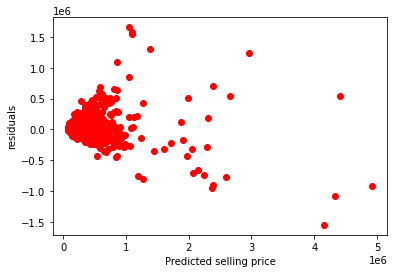

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')


**<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).


In [ ]:
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.7460217015531888

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61982766339.23467
MAE : 145995.40453021642
RMSE : 248963.383531062
R2 : 0.7582220749069398
Adjusted R2 :  0.7527519861039295


Text(0, 0.5, 'Predicted selling price')

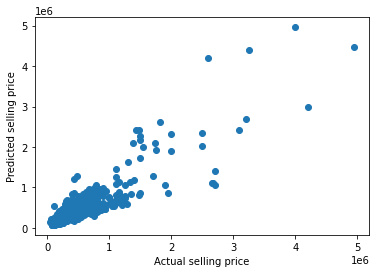

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

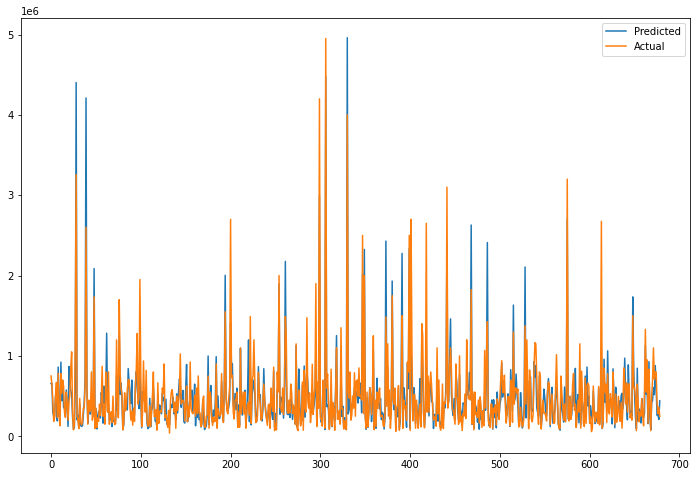

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

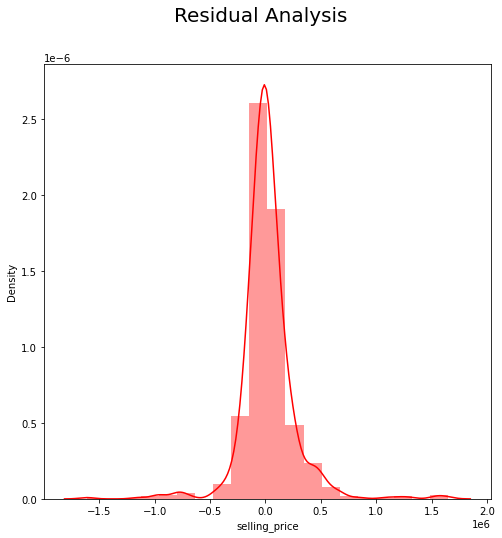

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

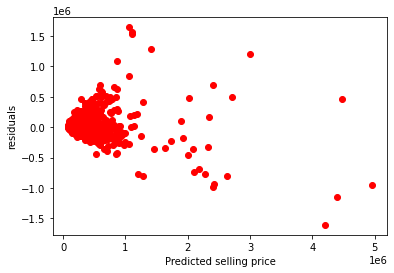

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## Running Grid Search Cross Validation for Ridge Regression

---


In [ ]:

# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.029408608138141886


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61985423632.18315
RMSE : 248968.72018826613
R2 : 0.7582117095293778
Adjusted R2 :  0.7527413862155627


Text(0, 0.5, 'Predicted selling price')

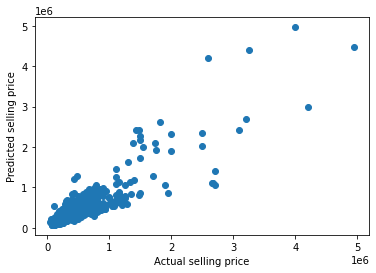

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

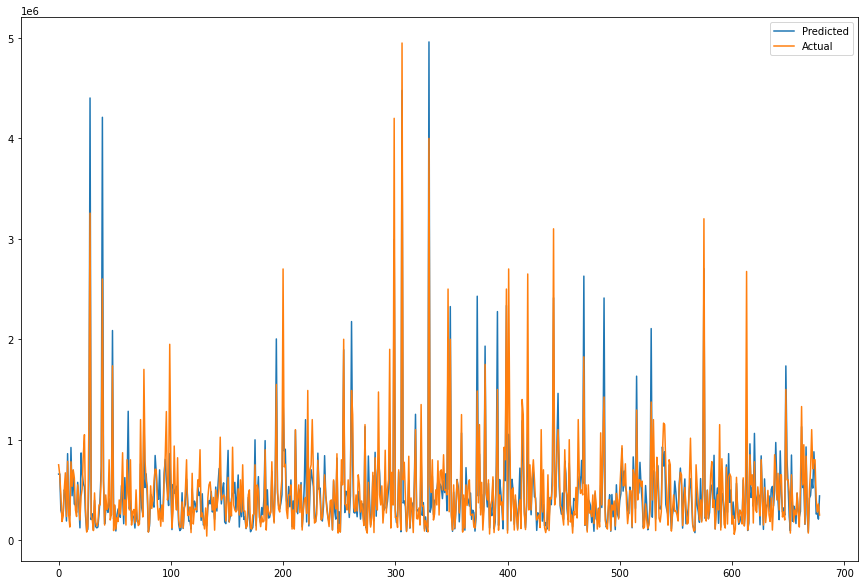

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

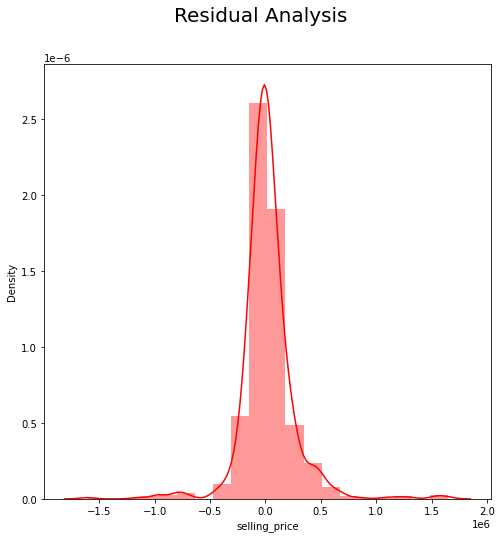

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

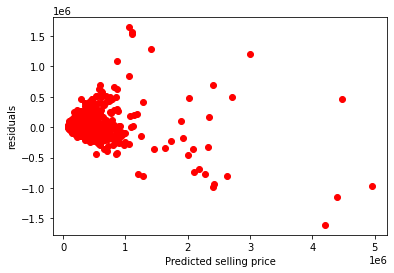

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Conclusion**



---
From above model we can conclude that below point:

*  Automatic vehicles fetch higher resale price compared to manual ones.
*  Age of the vehicle seems to show negative correlation with selling price.
* Past_Owners and Kms_Driven are showing very less correlation with selling price.
*  Resale value of cars with Fuel type CNG is higher as comapre to other.
* Average price of a car directly influences Selling Price prediction.Both are highly correlated and here directly proportional to each other.

